In [76]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report
from sklearn.naive_bayes import MultinomialNB , CategoricalNB, GaussianNB
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
df = pd.read_csv("fertility2.csv")
df.sample(10)

,Age,kidney diseases,Fasting Blood sugar,Uri infection,exercise habit,Frequency of alcohol consumption,Smoking habit,profession,#hours spent sitting per day,Diagnosis
81,33,no,94,yes,no,once a week,occasional,accountant,3,weak
135,24,yes,86,no,more than 3 months ago,several times a week,daily,engineer,6,Normal
68,58,yes,180,no,no,once a week,occasional,pilot,6,weak
34,28,yes,94,yes,no,hardly ever or never,never,engineer,11,Normal
137,44,yes,79,no,more than 3 months ago,several times a week,daily,pilot,6,weak
51,28,yes,94,no,no,hardly ever or never,never,engineer,14,Normal
71,30,no,94,no,no,hardly ever or never,never,engineer,6,Normal
45,28,yes,94,no,no,hardly ever or never,occasional,accountant,8,weak
31,28,yes,90,no,more than 3 months ago,hardly ever or never,never,engineer,8,Normal
0,30,no,80,yes,more than 3 months ago,once a week,occasional,engineer,16,Normal


In [78]:
df['exercise habit'].replace('no exercise', 'no',inplace=True)

le = LabelEncoder()

for column in df.columns : 
  if df[column].dtype == "object" : 
    df[column] = le.fit_transform(df[column])

In [79]:
df

,Age,kidney diseases,Fasting Blood sugar,Uri infection,exercise habit,Frequency of alcohol consumption,Smoking habit,profession,#hours spent sitting per day,Diagnosis
0,30,0,80,1,2,2,2,1,16,0
1,35,1,140,1,0,2,0,1,6,1
2,27,1,99,0,3,1,1,1,9,0
3,44,0,96,1,2,1,1,2,7,0
4,30,1,134,0,0,2,1,1,9,1
...,...,...,...,...,...,...,...,...,...,...
134,31,1,90,0,3,4,2,1,6,0
135,24,1,86,0,2,4,0,1,6,0
136,28,0,91,0,3,4,2,1,6,0
137,44,1,79,0,2,4,0,2,6,1


In [80]:
X = df.drop("Diagnosis" , axis=1)
y = df["Diagnosis"]

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

In [82]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
y_pred = mnb.predict(X_test)

In [83]:
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.60


In [84]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.42      0.54        24
           1       0.52      0.83      0.64        18

    accuracy                           0.60        42
   macro avg       0.64      0.62      0.59        42
weighted avg       0.66      0.60      0.58        42



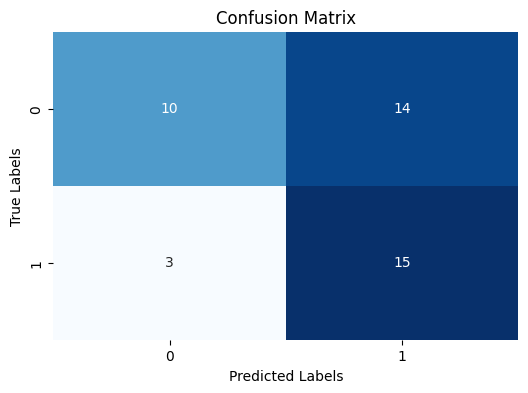

In [85]:
cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [86]:
cnb = CategoricalNB()
cnb.fit(X_train,y_train)
y_pred = cnb.predict(X_test)

In [87]:
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.67


In [88]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.83      0.74        24
           1       0.67      0.44      0.53        18

    accuracy                           0.67        42
   macro avg       0.67      0.64      0.64        42
weighted avg       0.67      0.67      0.65        42



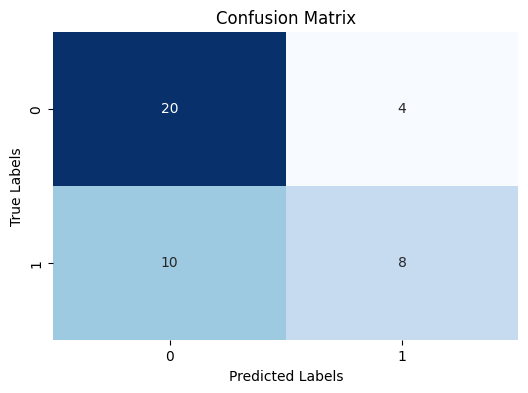

In [89]:
cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [90]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)

In [91]:
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.71


In [92]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.67      0.73        24
           1       0.64      0.78      0.70        18

    accuracy                           0.71        42
   macro avg       0.72      0.72      0.71        42
weighted avg       0.73      0.71      0.72        42



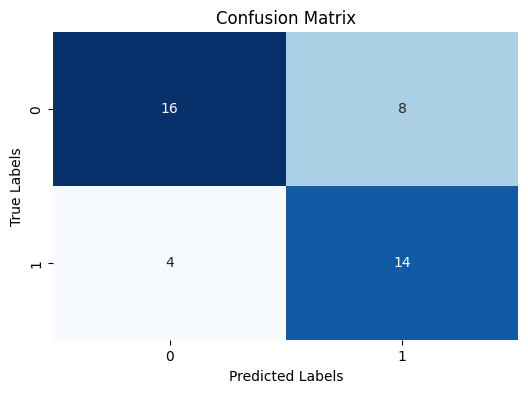

In [93]:
cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
